<a href="https://colab.research.google.com/github/hungviet0304/DS_Final_project/blob/master/Process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Section
===

In [1]:
import pandas as pd
import numpy as np
import os
import copy
import math
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [2]:
from sklearn.metrics import mean_squared_error


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier

# You can also import other things ...
# YOUR CODE HERE (OPTION)
import re
from sklearn import preprocessing

Load and split
===

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
cd "drive/My Drive/Colab Notebooks/DS/Project/Data"

/content/drive/My Drive/Colab Notebooks/DS/Project/Data


In [11]:
#pwd = %pwd
#if pwd != 'C:\\Users\\Admin\\Documents\\GitHub\\DS_Final_project\\data':
#    %cd ./data

C:\Users\Admin\Documents\GitHub\DS_Final_project\data


In [12]:
# load data
file_list = os.listdir()
data_tmp = []
for file in file_list:
    df = pd.read_csv(file)
    data_tmp.append(df)
final_df = pd.concat(data_tmp, axis = 0, ignore_index=True)

In [13]:
final_df.describe(include="all")

,title,runtime,des,date,genre,cast,director,vote,gross,rating
count,78450,78450,78447,78450.000000,78450,77035,55833,7.845000e+04,4529,78450.000000
unique,60555,552,57146,NaN,1014,61886,35901,NaN,1278,NaN
top,Run,0,Add a Plot,NaN,Documentary,Missy Jubilee,Kevin Dunn,NaN,$0.01M,NaN
freq,15,7605,8135,NaN,5444,26,98,NaN,342,NaN
mean,NaN,NaN,NaN,2014.172569,NaN,NaN,NaN,4.836305e+03,NaN,4.144744
std,NaN,NaN,NaN,26.032289,NaN,NaN,NaN,3.736042e+04,NaN,3.422669
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000e+00,NaN,0.000000
25%,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,0.000000e+00,NaN,0.000000
50%,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,1.400000e+01,NaN,5.500000
75%,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,2.020000e+02,NaN,7.200000


In [14]:
df = final_df.copy()
df = df[df.rating != 0]
df = df.drop_duplicates(subset=None,keep="first")
df.head()

,title,runtime,des,date,genre,cast,director,vote,gross,rating
0,Star Wars: Episode VIII - The Last Jedi,151,Rey develops her newly discovered abilitie...,2017,"Action, Adventure, Fantasy","Daisy Ridley, John Boyega, Mark Hamill, Carrie...",Rian Johnson,511977,$620.18M,7.0
1,Game of Thrones,57,Nine noble families fight for control over...,2019,"Action, Adventure, Drama","Emilia Clarke, Peter Dinklage, Kit Harington, ...",NaN,1624187,NaN,9.3
2,Vikings,44,Vikings transports us to the brutal and my...,2013,"Action, Adventure, Drama","Katheryn Winnick, Gustaf Skarsgård, Alexander ...",NaN,367194,NaN,8.6
3,Star Wars: Episode VII - The Force Awakens,138,"Three decades after the Empire's defeat, a...",2015,"Action, Adventure, Sci-Fi","Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",J.J. Abrams,818309,$936.66M,7.9
4,Rogue One: A Star Wars Story,133,The daughter of an Imperial scientist join...,2016,"Action, Adventure, Sci-Fi","Felicity Jones, Diego Luna, Alan Tudyk, Donnie...",Gareth Edwards,511959,$532.18M,7.8


In [15]:
# Tách X và y
y_sr = df["rating"] # sr là viết tắt của series
X_df = df.drop("rating", axis=1)

In [16]:
# Tách tập train và tập validation theo tỉ lệ 70%:30%
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, test_size=0.3, 
                                                              stratify=y_sr, random_state=0)

In [17]:
train_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29834 entries, 49202 to 3929
Data columns (total 9 columns):
title       29834 non-null object
runtime     29834 non-null object
des         29834 non-null object
date        29834 non-null int64
genre       29834 non-null object
cast        29558 non-null object
director    21919 non-null object
vote        29834 non-null int64
gross       2610 non-null object
dtypes: int64(2), object(7)
memory usage: 2.3+ MB


In [18]:
val_X_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12787 entries, 73623 to 69684
Data columns (total 9 columns):
title       12787 non-null object
runtime     12787 non-null object
des         12787 non-null object
date        12787 non-null int64
genre       12787 non-null object
cast        12656 non-null object
director    9363 non-null object
vote        12787 non-null int64
gross       1147 non-null object
dtypes: int64(2), object(7)
memory usage: 999.0+ KB


In [19]:
train_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross
49202,Homicide for the Holidays,0,"For most, the winter holidays mean bringing fa...",2019,Crime,"James Zeiss, Vanessa Molinelli, Mitch Damron, ...",NaN,22,NaN
30380,Song from the Forest,98,"25 years ago, Louis Sarno, an American, heard ...",2013,"Documentary, Biography, Music","Louis Sarno, Samedi Mathurin Bokombe, Jim Jarm...",Michael Obert,209,NaN
61848,"Hieronymus Bosch, Touched by the Devil",86,"In 2016, the Noordbrabants Museum in the Dutch...",2015,Documentary,"Matthijs Ilsink, Peter Klein, Jos Koldeweij, R...",Pieter van Huystee,263,$0.17M
16592,The Adventures of Tintin: Secret of the Unicor...,0,Add a Plot,2011,Adventure,"Erik Braa, Adam Harrington, Brian Sommer",NaN,13,NaN
47346,Forgiving Chris Brown,12,Forgiving Chris Brown is a dark comedy short t...,2015,"Short, Comedy, Drama","Lodric D. Collins, Tami Jordan, Tanda Kerín, T...",Marquette Jones,9,NaN


In [20]:
genre_rating_df = train_X_df["genre"].to_frame().join(train_y_sr)

In [21]:
genre_rating_df.head()

,genre,rating
49202,Crime,7.1
30380,"Documentary, Biography, Music",6.9
61848,Documentary,6.5
16592,Adventure,7.5
47346,"Short, Comedy, Drama",8.2


Investigating the influence of some features into ratings
===

Counter({'Comedy': 10512, 'Documentary': 8119, 'Drama': 8105, 'Action': 6215, 'Short': 6168, 'Adventure': 4731, 'Crime': 4102, 'Romance': 3999, 'Animation': 3784, 'Biography': 2870, 'Family': 1352, 'Horror': 1311, 'Thriller': 1268, 'Fantasy': 1114, 'History': 1053, 'Sci-Fi': 904, 'Music': 893, 'Mystery': 810, 'Sport': 522, 'Musical': 197, 'News': 191, 'War': 189, 'Reality-TV': 181, 'Talk-Show': 83, 'Western': 72, 'Game-Show': 58})
len =  26


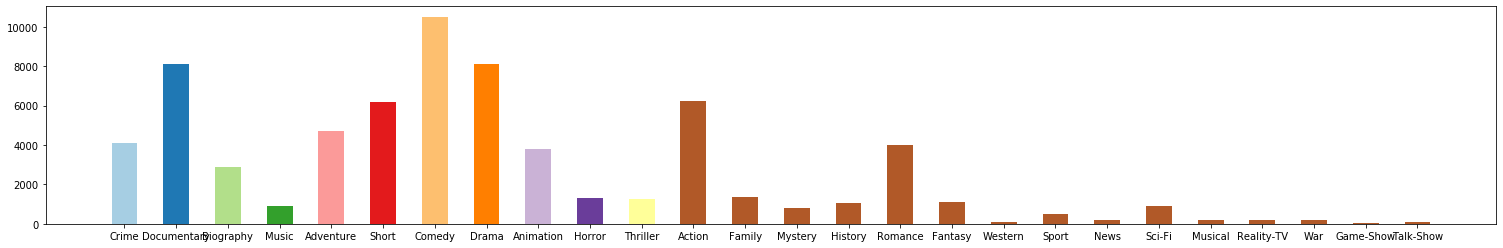

In [22]:
from collections import Counter

list_gens = list(genre_rating_df.genre)
unique_gen = []
for g in list_gens:
    unique_gen += g.strip().split(", ")
dict_gens = Counter(unique_gen)
print(dict_gens)
print("len = ",len(dict_gens))
plt.figure(figsize=(26,4))
plt.bar(dict_gens.keys(),dict_gens.values(), width = 0.5, color=plt.cm.Paired(np.arange(len(dict_gens))))
plt.show()

**The impact of genres on rating**

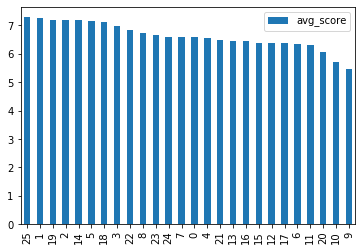

In [23]:
hist = {}
for i in range(genre_rating_df.shape[0]):
  genres = genre_rating_df.iloc[i].genre.strip().split(", ")
  rating  = genre_rating_df.iloc[i].rating
  for g in genres:
    if g not in hist:
      hist[g] = [rating]
    else:
      hist[g].append(rating)
keys = list(hist.keys())
vals = list(hist.values())
vals = [np.mean(x) for x in vals]

assert len(keys) == len(vals)
hist_df = pd.DataFrame(columns=["genre","avg_score"])
hist_df.genre = keys
hist_df.avg_score = vals
hist_df = hist_df.sort_values(by = ["avg_score"],ascending=False)
hist_df.plot.bar()


In [24]:
print(hist_df)

          genre  avg_score
25    Talk-Show   7.298795
1   Documentary   7.260266
19         News   7.194764
2     Biography   7.191916
14      History   7.184995
5         Short   7.151443
18        Sport   7.127395
3         Music   6.975700
22   Reality-TV   6.839227
8     Animation   6.721670
23          War   6.657672
24    Game-Show   6.594828
7         Drama   6.584762
0         Crime   6.576085
4     Adventure   6.561002
21      Musical   6.498985
13      Mystery   6.464074
16      Fantasy   6.456463
15      Romance   6.398225
12       Family   6.380843
17      Western   6.380556
6        Comedy   6.361530
11       Action   6.305889
20       Sci-Fi   6.047788
10     Thriller   5.713407
9        Horror   5.465523


Feature Engineering
===

Compute IF-IDF of specific columns

In [25]:
class tf_idf(BaseEstimator, TransformerMixin):
  def __init__(self, columns):
    self.columns = columns
  def fit(self, X_df, y=None):
    self.vectorizer = []
    for column in self.columns:
      tf = TfidfVectorizer()
      self.vectorizer.append(tf.fit(X_df[column]))
    return self
  def transform(self, X_df, y=None):
    new_X_df = X_df.copy()
    for i, column in enumerate(self.columns):
      transformed = self.vectorizer[i].transform(new_X_df[column])
      new_X_df[column] = [transformed[j].sum() for j in range(len(new_X_df))]
    return new_X_df

Preprocessing pipeline:
  - Compute IF-IDF of text features (genre, cast, director).
  - Filling missing values by median of its columns.
  - Standard Scaling in order to help SGD, ... converging more easily.

In [26]:
columns = ['genre','cast','director']
preprocess_pipeline= Pipeline(steps=[('compute_tfidf', tf_idf(columns)),
                                     ('imputing',SimpleImputer(missing_values = 0, strategy='median')),
                                     ("scaling",StandardScaler())])

In [27]:
#replace NaN element in cast to "other"
def fill_na(df):
  df = df.drop(columns=['title','des']) # not necessary for predicting
  df["director"] = df["director"].fillna("other_director");
  df["cast"] = df["cast"].fillna("other_cast");
  df["gross"] = df["gross"].fillna("0.0");
  #define money
  money = {"M": 10**6, "B": 10**12, "G": 10**9, "P": 10**15, "K": 10**3, "0": 0}
  for i in range(len(df)):
      
      df.gross.iloc[i] = float(re.findall("\d+\.\d+", df.gross.iloc[i])[0]) * money[df.gross.iloc[i][-1]]
  return df

In [28]:
# pipeline for RandomForest
full_pipeline = Pipeline(steps=[('preprocess',preprocess_pipeline),
                                ("regress", RandomForestRegressor(max_depth=10))])

In [29]:
#pipeline for linear regression
linear_regress_pipeline = Pipeline(steps=[('preprocess',preprocess_pipeline),
                                ("regress", LinearRegression())])

Predict
===

##**Experiment with Linear Regression Model**

In [30]:
%%time
filled_train_X_df = fill_na(train_X_df)
filled_val_X_df = fill_na(val_X_df)
linear_regress_pipeline.fit(filled_train_X_df, train_y_sr)
val_err = (1- linear_regress_pipeline.score(filled_val_X_df, val_y_sr))*100
train_err = (1 -  linear_regress_pipeline.score(filled_train_X_df, train_y_sr)) * 100

D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Wall time: 3min 5s


In [31]:
print("Error on train set: {}".format(train_err))
print("Error on val set: {}".format(val_err))

Error on train set: 94.18157487573599
Error on val set: 94.34285009967508


In [32]:
# get predictions
linear_preds = linear_regress_pipeline.predict(filled_val_X_df)

Visualize True and Pred values

Text(0.5, 1.0, 'Result of the first 30 entries of val set')

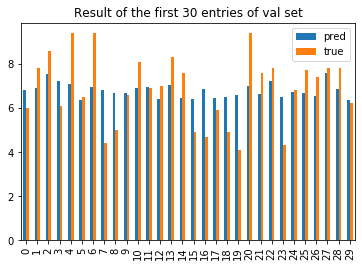

In [33]:
linear_pred_df = pd.DataFrame(columns =['pred','true'])
linear_pred_df['pred'] = linear_preds[:30]
linear_pred_df['true'] = list(val_y_sr[:30])
linear_pred_df.plot.bar()
plt.title("Result of the first 30 entries of val set")

##**Experiment RandomForest Model** (about 17mins to run)
  - Choose the best model by tuning the depth and number of tree in forest.
  - There are four choices of depth: 10, 20, 30, 40.
  - Number of trees: 40, 50, 60.
  - We decided these values because of the computational cost.

In [34]:
%%time
max_depth = [10,20,30,40]
n_estimators = [40, 50, 60]
best_depth = 0
val_errs = []
train_errs = []
best_val_err = float('inf')
best_estimator = 0
filled_train_X_df = fill_na(train_X_df)
filled_val_X_df = fill_na(val_X_df)
for estimator in n_estimators:
  print("estimator: {}".format(estimator))
  for depth in max_depth:
    print("depth: {}".format(depth))
    full_pipeline.set_params(regress__n_estimators=estimator, regress__max_depth=depth)
    full_pipeline.fit(filled_train_X_df,train_y_sr)
    cur_train_err = (1 -  full_pipeline.score(filled_train_X_df, train_y_sr)) * 100
    train_errs.append(cur_train_err)
    cur_val_err = (1- full_pipeline.score(filled_val_X_df, val_y_sr))*100
    val_errs.append(cur_val_err)
    if cur_val_err < best_val_err:
      best_val_err = cur_val_err
      best_estimator = estimator
      best_depth = depth


D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


estimator: 40
depth: 10
depth: 20
depth: 30
depth: 40
estimator: 50
depth: 10
depth: 20
depth: 30
depth: 40
estimator: 60
depth: 10
depth: 20
depth: 30
depth: 40
Wall time: 21min 2s


In [35]:
print("best depth: {}".format(best_depth))
print("best estimator: {}".format(best_estimator))
print("Error on train set: {}".format(train_err))
print("Error on val set: {}".format(val_err))

best depth: 30
best estimator: 60
Error on train set: 94.18157487573599
Error on val set: 94.34285009967508


In [36]:
# train again with best_depth and best_estimator
full_pipeline.set_params(regress__n_estimators=best_estimator, regress__max_depth=best_depth)
full_pipeline.fit(filled_train_X_df,train_y_sr)
forest_preds = full_pipeline.predict(filled_val_X_df)

Visualize True and Pred values

Text(0.5, 1.0, 'Result of the first 30 entries of val set')

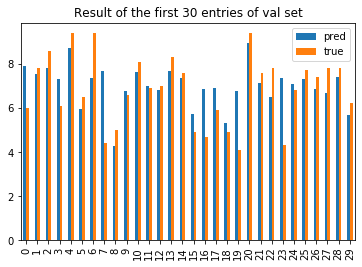

In [37]:
randomforest_df = pd.DataFrame(columns =['pred','true'])
randomforest_df['pred'] = forest_preds[:30]
randomforest_df['true'] = list(val_y_sr[:30])
randomforest_df.plot.bar()
plt.title("Result of the first 30 entries of val set")

Plot results of both linear regression and Randomforest in validation set

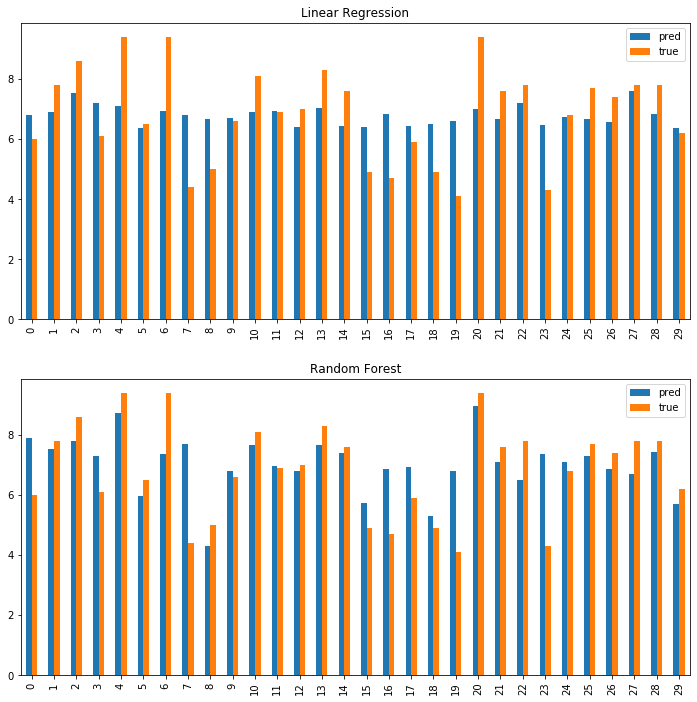

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=1)
linear_pred_df[["pred","true"]].plot(ax=axes[0],kind='bar', title="Linear Regression",figsize=(12,12))
randomforest_df[["pred", "true"]].plot(ax=axes[1], kind='bar', title='Random Forest');

Nhận xét: Với Random Forest mô hình cho kết quả tốt nhất.

##Working with test set

In [56]:
%pwd

'C:\\Users\\Admin\\Documents\\GitHub\\DS_Final_project'

In [57]:
#path = "../testdata"
path = "C:\\Users\\Admin\\Documents\\GitHub\\DS_Final_project\\test"
#file_list = os.listdir("../testdata")
file_list = os.listdir(path)
data_tmp = []
for file in file_list:
    
    df = pd.read_csv(os.path.join(path,file))
    data_tmp.append(df)
test_X_df = pd.concat(data_tmp, axis = 0, ignore_index=True)


In [64]:
test_X_df.head()

,title,runtime,des,date,genre,cast,director,vote,gross
0,Birds of Prey: And the Fantabulous Emancipatio...,0,"After splitting with the Joker, Harley Qui...",2020,"Action, Adventure, Crime","Margot Robbie, Mary Elizabeth Winstead, Ewan M...",Cathy Yan,0,NaN
1,No Time to Die,0,Bond has left active service. His peace is...,2020,"Action, Adventure, Thriller","Ana de Armas, Daniel Craig, Léa Seydoux, Rami ...",Cary Joji Fukunaga,0,NaN
2,Wonder Woman 1984,0,Plot unknown. A sequel to the 2017 superhe...,2020,"Action, Adventure, Fantasy","Pedro Pascal, Gal Gadot, Kristen Wiig, Chris Pine",Patty Jenkins,0,NaN
3,Black Widow,0,A film about Natasha Romanoff in her quest...,2020,"Action, Adventure, Sci-Fi","Florence Pugh, Scarlett Johansson, Robert Down...",Cate Shortland,0,NaN
4,Dune,0,Feature adaptation of Frank Herbert's scie...,2020,"Adventure, Drama, Sci-Fi","Timothée Chalamet, Rebecca Ferguson, Oscar Isa...",Denis Villeneuve,0,NaN


In [59]:
test_pred =full_pipeline.predict(fill_na(test_X_df))

D:\app\anaconda\run\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Visualize result of test set

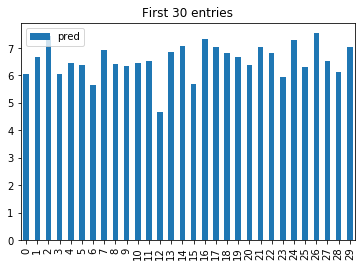

In [75]:
test_pred_df = pd.DataFrame(test_pred, columns=["pred"])
test_pred_df[:30].plot(kind = 'bar', title ='First 30 entries')

In [76]:
test_pred_df.to_csv("result.csv",header = True)